# Feature selection in Regression using Mutual Information

#### Loading the dependencies 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
data = pd.read_csv('./CarPricesData.csv')
data.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


In [3]:
data.isnull().mean()*100

Price        0.000000
Age          0.139276
KM           0.000000
FuelType     0.278552
HP           0.000000
MetColor     0.000000
Automatic    0.000000
CC           0.139276
Doors        0.000000
Weight       0.139276
dtype: float64

In [4]:
data.dropna(inplace=True)

In [5]:
data.duplicated().sum()

1

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
le = LabelEncoder()

In [8]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])

In [9]:
data.sample(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
611,7950,67.0,155500,2,110,1,0,1600.0,5,1050.0
767,9500,57.0,78955,2,86,1,0,1300.0,5,1045.0
409,11950,54.0,101352,2,110,0,0,1600.0,5,1080.0
1036,8950,62.0,25505,2,86,1,0,1300.0,5,1035.0
929,9995,57.0,55844,2,86,1,0,1300.0,5,1045.0
936,10950,63.0,54936,2,110,1,0,1600.0,5,1075.0
297,12850,40.0,41339,2,110,1,0,1600.0,5,1080.0
499,9950,53.0,57948,2,97,1,0,1400.0,3,1025.0
210,13250,41.0,81106,1,69,1,0,1900.0,5,1140.0
1413,8750,74.0,42317,2,107,1,1,1600.0,5,1100.0


#### Feature selection is performed using Information Gain.

<li> Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.
<li> The scikit-learn machine learning library provides an implementation of mutual information for feature selection with numeric input and output variables via the mutual_info_regression() function.

#### Selecting the features and targets

In [10]:
x = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

#### Splitting the data into training and testing sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42, shuffle=True)

#### Defining feature selection with all features included

In [12]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')

#### Fitting the fs

In [13]:
fs.fit(x_train, y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x00000247C3F15310>)

#### Transorm the train and test data

In [14]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

#### We can perform feature selection using mutual information on the dataset and print and plot the scores (larger is better)

### Checking the scores for the features

In [15]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.814822
Feature 1: 0.241964
Feature 2: 0.000000
Feature 3: 0.144548
Feature 4: 0.021523
Feature 5: 0.000000
Feature 6: 0.167944
Feature 7: 0.000000
Feature 8: 0.275768


#### Plotting the scores in a bar grapgh

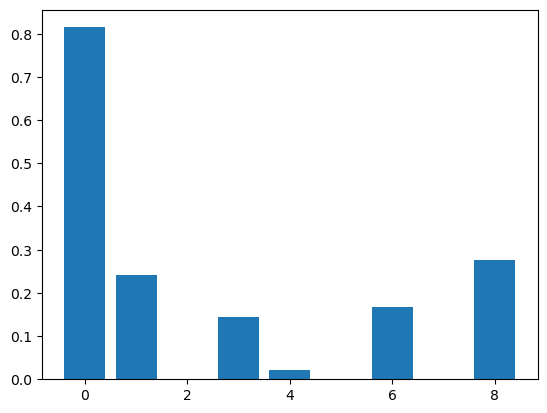

In [16]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

<li> The plot clearly shows 5 features are a lot more important than the other features.
<li> We could set k=5 When configuring the SelectKBest to select these top features.